In [2]:
#basic imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#getting rating data
df = pd.read_csv('Netflix_Dataset_Rating.csv')

In [4]:
df.head()

,User_ID,Rating,Movie_ID
0,712664,5,3
1,1331154,4,3
2,2632461,3,3
3,44937,5,3
4,656399,4,3


In [64]:
#getting information about title
movie_df = pd.read_csv('Netflix_Dataset_Movie.csv')
movie_df.head()

,Movie_ID,Year,Name
0,1,2003,Dinosaur Planet
1,2,2004,Isle of Man TT 2004 Review
2,3,1997,Character
3,4,1994,Paula Abdul's Get Up & Dance
4,5,2004,The Rise and Fall of ECW


In [6]:
final_df = pd.merge(df,movie_df,on='Movie_ID')

In [7]:
final_df.head()

,User_ID,Rating,Movie_ID,Year,Name
0,712664,5,3,1997,Character
1,1331154,4,3,1997,Character
2,2632461,3,3,1997,Character
3,44937,5,3,1997,Character
4,656399,4,3,1997,Character


In [8]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17337458 entries, 0 to 17337457
Data columns (total 5 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   User_ID   int64 
 1   Rating    int64 
 2   Movie_ID  int64 
 3   Year      int64 
 4   Name      object
dtypes: int64(4), object(1)
memory usage: 661.4+ MB


In [9]:
final_df.describe()

,User_ID,Rating,Movie_ID,Year
count,1.733746e+07,1.733746e+07,1.733746e+07,1.733746e+07
mean,1.321158e+06,3.590570e+00,2.302783e+03,1.993895e+03
std,7.646923e+05,1.062665e+00,1.303458e+03,1.248583e+01
min,6.000000e+00,1.000000e+00,3.000000e+00,1.920000e+03
25%,6.602280e+05,3.000000e+00,1.176000e+03,1.990000e+03
50%,1.316775e+06,4.000000e+00,2.342000e+03,1.999000e+03
75%,1.983213e+06,4.000000e+00,3.433000e+03,2.002000e+03
max,2.649429e+06,5.000000e+00,4.496000e+03,2.005000e+03


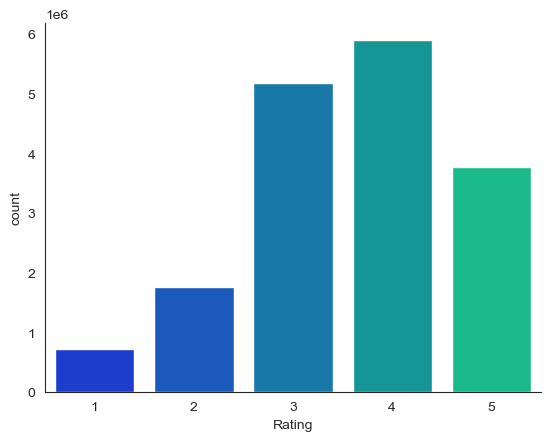

In [23]:
#distribution pf rating
sns.countplot(x='Rating',data=final_df,palette='winter')
sns.despine()


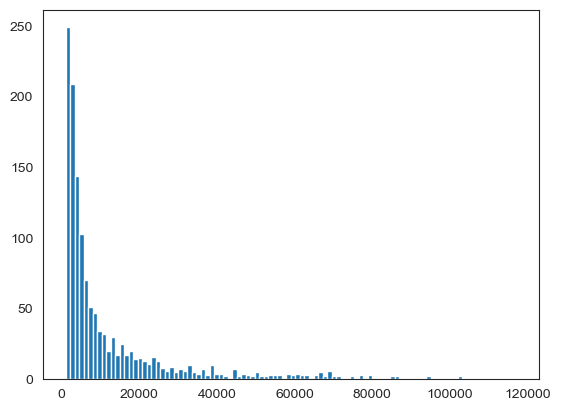

In [11]:
#distribution of Reviews per title
sns.set_style('white')
plt.hist(x=final_df['Name'].value_counts(),bins=100)
%matplotlib inline
#most title are reviewed cin 0 to 10 times range

In [12]:
#get information about average rating recevied by any title and how many ratings it has recevied
title_mean = final_df.groupby('Name')['Rating'].mean()
title_count = final_df.groupby('Name')['Rating'].count()

In [13]:
title_mean
#average rating per title

Name
10                                             3.113049
10 Things I Hate About You                     3.703471
101 Dalmatians II: Patch's London Adventure    3.528282
11:14                                          3.260153
13 Ghosts                                      3.595732
                                                 ...   
Yojimbo                                        4.021298
Young Black Stallion                           3.259422
Youngblood                                     3.273667
Yu-Gi-Oh!: The Movie                           3.192789
Zorro                                          3.308292
Name: Rating, Length: 1342, dtype: float64

In [14]:
title_count
#how many times title has been reviewed

Name
10                                              4644
10 Things I Hate About You                     38465
101 Dalmatians II: Patch's London Adventure     5622
11:14                                           1699
13 Ghosts                                       6560
                                               ...  
Yojimbo                                         8968
Young Black Stallion                            1592
Youngblood                                      3000
Yu-Gi-Oh!: The Movie                            1997
Zorro                                           1797
Name: Rating, Length: 1342, dtype: int64

In [15]:
rating_count = pd.merge(title_mean,title_count,on='Name')
#merging rating and count on title

In [16]:
#adjusting names
rating_count['Rating'] = rating_count['Rating_x']
rating_count['Count'] = rating_count['Rating_y']
rating_count.drop(['Rating_x','Rating_y'],axis=1,inplace=True)

In [17]:
rating_count

,Rating,Count
Name,,
10,3.113049,4644
10 Things I Hate About You,3.703471,38465
101 Dalmatians II: Patch's London Adventure,3.528282,5622
11:14,3.260153,1699
13 Ghosts,3.595732,6560
...,...,...
Yojimbo,4.021298,8968
Young Black Stallion,3.259422,1592
Youngblood,3.273667,3000


In [18]:
#highest rated movies/Series
rating_count.sort_values(by='Rating',ascending=False).head(5)

,Rating,Count
Name,,
Lost: Season 1,4.665432,4860
The Simpsons: Season 6,4.589824,7331
Family Guy: Freakin' Sweet Collection,4.520766,8090
Six Feet Under: Season 4,4.461601,8581
Inu-Yasha,4.457774,1042


In [19]:
#most reviewed 
rating_count.sort_values(by='Count',ascending=False).head(5)

,Rating,Count
Name,,
Pirates of the Caribbean: The Curse of the Black Pearl,4.146334,117075
Lord of the Rings: The Fellowship of the Ring,4.431489,102721
The Sixth Sense,4.311469,102376
American Beauty,3.937733,101450
Bruce Almighty,3.404323,98545


In [20]:
#creating pivot table of user_id and Titles where value=Rating
title_mat = pd.pivot_table(final_df,index='User_ID',columns='Name',values='Rating')

In [21]:
title_mat

Name,10,10 Things I Hate About You,101 Dalmatians II: Patch's London Adventure,11:14,13 Ghosts,18 Again,1984,2 Fast 2 Furious,200 Cigarettes,2010: The Year We Make Contact,...,Xena: Warrior Princess: Season 3,Xena: Warrior Princess: Series Finale,Y Tu Mama Tambien,Yellow Submarine,Yi Yi,Yojimbo,Young Black Stallion,Youngblood,Yu-Gi-Oh!: The Movie,Zorro
User_ID,,,,,,,,,,,,,,,,,,,,,
6,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79,NaN,NaN,3.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN
97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
134,NaN,5.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2649370,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2649378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
2649388,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now once pivot table and rating,count dataframe is created its time to create a function which will recommend similar titles

In [22]:
rating_count['Count'].describe()

count      1342.000000
mean      12919.119225
std       17869.065263
min        1042.000000
25%        2607.750000
50%        5241.500000
75%       14964.000000
max      117075.000000
Name: Count, dtype: float64

In [35]:
def recommend_func(movie):
    pivot_movie = title_mat[movie]
    similar_movie = title_mat.corrwith(pivot_movie)
    similar_movie.dropna(inplace=True)
    similar_df = pd.DataFrame(similar_movie,columns=['Correlation'])
    similar_df = similar_df.join(rating_count['Count'])
    similar_df = similar_df[similar_df['Count']>13000]
    similar_df.reset_index(inplace=True)
    list_title = list(similar_df.sort_values(by='Correlation',ascending=False)['Name'])
    print('You might also like: ')
    for i in range(1,10):
        print(list_title[i])
        

In [71]:
movie = input('Enter movie: ')
recommend_func(movie)

Enter movie: Friends: Season 6
You might also like: 
The Best of Friends: Season 1
The Best of Friends: Season 2
Friends: Season 2
Sex and the City: Season 4
CSI: Season 1
Three Men and a Little Lady
Look Who's Talking
The Lion King: Special Edition
I Still Know What You Did Last Summer
